# convert pleco dump to spreadsheet

In [1]:
#import xml file
import xml.etree.ElementTree as ET
import csv
tree = ET.parse('./Report.xml')
root = tree.getroot()
card_data = []
for card in root.findall(".//card"):
    card_datum = {}
    card_datum["created_stamp"] = card.get("created")
    card_datum["modified_stamp"] = card.get("modified")
    
    entry = card.find("./entry")
    card_datum["traditional"] = entry.find("./headword[@charset='tc']").text

    if entry.find("./cantopron") is None:
        continue
    card_datum["jyutping"] = entry.find("./cantopron").text
    
    if card.find("scoreinfo") is None:
        continue
    card_datum["correct"] = int(card.find("scoreinfo").get("correct"))
    card_datum["incorrect"] = int(card.find("scoreinfo").get("incorrect"))
    card_datum["difficulty"] = int(card.find("scoreinfo").get("difficulty"))
    card_datum["priority"] = card.find("scoreinfo").get("priority")
    card_datum["last_reviewed_stamp"] = int(card.find("scoreinfo").get("lastreviewedtime"))
    card_data.append(card_datum)
    
    

    
    
#convert xml to csv
import pandas as pd
cards_frame = pd.DataFrame(card_data)
for stamp in ["last_reviewed_stamp","created_stamp","modified_stamp"]:
    cards_frame[stamp] = pd.to_datetime(cards_frame[stamp],unit='s')
    
cards_frame.sort_values("created_stamp", ascending=False,inplace=True)
cards_frame.to_csv('./Report.csv', index = False)


# View 30 Most Recently Added Vocabs

In [2]:
#30 most recently added
cards_frame.sort_values("created_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
880,2021-09-01 19:32:38,2021-09-01 19:44:38,一鑊熟,jat1 wok6 suk6,0,0,100,None,2021-09-01 19:47:53
879,2021-09-01 19:32:06,2021-09-01 19:44:38,鬼婆,gwai2 po4,0,0,100,None,2021-09-01 19:47:08
878,2021-09-01 19:31:41,2021-09-01 19:44:38,食蕉,sik6 ziu1,0,0,100,None,2021-09-01 19:47:45
877,2021-09-01 19:29:19,2021-09-01 19:44:38,一天都光晒,jat1 tin1 dou1 gwong1 saai3,0,0,100,None,2021-09-01 19:46:54
876,2021-09-01 19:28:48,2021-09-01 19:44:38,反胃,faan2 wai6,0,0,100,None,2021-09-01 19:47:38
875,2021-09-01 19:28:09,2021-09-01 19:44:38,打冷震,daa2 laang5 zan3,0,0,100,None,2021-09-01 19:47:27
874,2021-09-01 19:27:45,2021-09-01 19:44:38,出世,ceot1 sai3,0,0,100,None,2021-09-01 19:46:46
873,2021-09-01 19:23:33,2021-09-01 19:44:38,打工,daa2 gung1,0,0,100,None,2021-09-01 19:47:24
872,2021-09-01 19:23:17,2021-09-01 19:44:38,即係,zik1 hai6,0,0,100,None,2021-09-01 19:47:55
871,2021-09-01 19:22:49,2021-09-01 19:44:38,菲律賓,fei1 leot6 ban1,0,0,100,None,2021-09-01 19:47:32


# View 30 Most Recently Reviewed Vocabs

In [3]:
#30 most recently reviewed
cards_frame.sort_values("last_reviewed_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
553,2020-11-04 16:20:53,2021-08-14 15:57:15,企鵝,kei5 ngo2,0,2,90,None,2021-09-01 19:48:01
872,2021-09-01 19:23:17,2021-09-01 19:44:38,即係,zik1 hai6,0,0,100,None,2021-09-01 19:47:55
880,2021-09-01 19:32:38,2021-09-01 19:44:38,一鑊熟,jat1 wok6 suk6,0,0,100,None,2021-09-01 19:47:53
863,2021-08-21 22:47:39,2021-08-21 22:56:37,勇敢,jung5 gam2,0,0,100,None,2021-09-01 19:47:49
878,2021-09-01 19:31:41,2021-09-01 19:44:38,食蕉,sik6 ziu1,0,0,100,None,2021-09-01 19:47:45
864,2021-09-01 19:15:18,2021-09-01 19:44:38,感覺,gam2 gok3,0,0,100,None,2021-09-01 19:47:42
876,2021-09-01 19:28:48,2021-09-01 19:44:38,反胃,faan2 wai6,0,0,100,None,2021-09-01 19:47:38
866,2021-09-01 19:19:14,2021-09-01 19:44:38,時差,si4 caa1,0,0,100,None,2021-09-01 19:47:34
871,2021-09-01 19:22:49,2021-09-01 19:44:38,菲律賓,fei1 leot6 ban1,0,0,100,None,2021-09-01 19:47:32
875,2021-09-01 19:28:09,2021-09-01 19:44:38,打冷震,daa2 laang5 zan3,0,0,100,None,2021-09-01 19:47:27


# View 30 Random Vocabs

In [4]:
#30 random words
cards_frame.sample(frac=1).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
738,2021-03-16 16:18:21,2021-07-23 16:14:07,分手,fan1 sau2,1,3,90,None,2021-03-26 15:00:59
595,2020-12-09 17:29:14,2021-07-23 16:14:07,午餐,ng5 caan1,4,3,80,None,2021-05-27 19:47:15
725,2021-03-09 19:23:48,2021-07-30 18:24:45,新冠,san1 gun1,2,0,96,veryhigh,2021-08-12 04:08:58
376,2020-06-10 12:10:06,2021-07-23 16:14:07,義大利,Ji6 daai6 lei6,7,5,68,None,2021-03-16 18:29:54
464,2020-08-22 15:53:45,2021-07-23 16:14:07,香水,hoeng1 seoi2,3,2,80,None,2021-03-23 14:48:53
657,2021-01-20 17:10:45,2021-07-23 16:14:07,決定,kyut3 ding6,0,3,90,None,2021-02-09 16:20:57
323,2020-06-01 11:44:20,2021-07-23 16:14:07,後日,hau6 jat6,7,7,74,None,2020-12-09 14:38:56
188,2020-04-15 20:39:09,2021-07-23 16:14:07,冬瓜,dung1 gwaa1,11,14,68,None,2021-03-20 17:12:18
214,2020-04-22 13:39:32,2021-07-23 16:14:07,多雲,do1 wan4,7,8,74,None,2021-03-16 18:27:04
49,2020-03-21 02:31:20,2021-07-23 16:14:07,白色,baak6 sik1,24,13,52,None,2021-03-25 12:29:33


# Cell Reserved for Searching

In [5]:
cards_frame[cards_frame.traditional.str.contains('朝')]

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
859,2021-08-14 16:10:12,2021-08-14 16:34:13,朝鮮,ciu4 sin1,0,2,90,None,2021-09-01 19:45:11
698,2021-02-09 21:22:07,2021-07-23 16:14:07,今朝,gam1 ziu1,2,0,100,None,2021-03-16 16:32:29
564,2020-11-18 03:55:50,2021-08-14 16:00:28,朝早,ziu1 zou2,0,2,92,None,2021-09-01 19:45:29


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
DatetimeIndex(['2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
               '2021-08-31', '2021-09-01', '2021-09-02'],
              dtype='datetime64[ns]', freq='D')


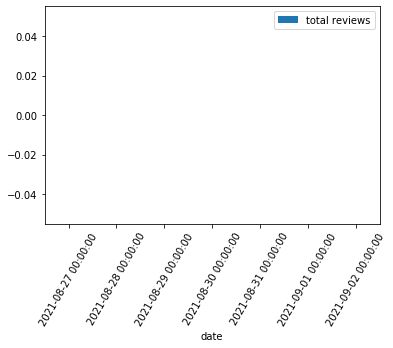

In [7]:
import datetime



today = pd.to_datetime("today").round('1d')
print(type(today))
week_range = pd.date_range(today-pd.Timedelta(days=6),today,freq='d')
print(week_range)
date2count ={"date":week_range,"total reviews":[0]*7}
for card_stamp in cards_frame["last_reviewed_stamp"]:
    if card_stamp in week_range:
        if card_stamp in date2count["date"]:
            date2count["total reviews"][list(week_range).index(card_stamp)] += 1
            

datesframe = pd.DataFrame(date2count)
datesframe.plot.bar(x='date', y='total reviews', rot=60)
